<div style="background-color:#96CDF2; padding:10px;color:#3B3C3E">
Licence <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">CC BY-SA</a>
<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licence Creative Commons" style="border-width:0; float:right;" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />
Germain Salvato Vallverdu - <tt>germain.vallverdu@univ-pau.fr</tt> <br />
<i><a href="http://iprem.univ-pau.fr/fr/index.html">IPREM</a> / <a href="http://www.univ-pau.fr/">Univ Pau &amp; Pays Adour</a></i>
</div>

# Diagramme en barres et densités de probabilité

Ce Notebook présente comment représenter un diagramme en barre ou une densité de probabilité avec matplotlib. Il utilise les données contenues dans le fichier `glassware.csv`. Il s'agit de la liste des volumes obtenus par 5 verreries habituelles de chimie lorsqu'on mesure 10 mL de liquide.

Dans ce notebook, on utilisera pandas pour la lecture des données et matplotlib pour tracer les graphiques.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

## 1. Lecture des données

Les données sont lues avec pandas. Chaque colonne ne contient pas exactement le même nombre de mesures, les mesures manquantes sont nulles dans le fichier `glassware.csv`. Pandas sait gèrer les valeurs manquantes mais il faut lors de la lecture lui préciser que les zéro (dans ce cas) sont des valeurs manquantes. C'est l'objet de l'arguemnts `na_values` de `read_csv()`.

In [2]:
df = pd.read_csv("glassware.csv", sep=",", na_values=[0.0])
df.head()

Becher  Burette  Fiole jaugée  Pipette  Éprouvette
0   8.1737   9.9122        9.8852   9.9175      9.8820
1   8.9482   9.9073        9.8800   9.9387      9.8221
2   8.1562   9.9627        9.8882   9.9527      9.9131
3  10.3871   9.9958        9.9443   9.9571      9.7597
4   8.7096  10.0036        9.9855   9.9442      9.7969

Ensuite la moyenne et les écarts types sont calculés à partir de la fonction `describe()`.

In [3]:
df.describe()

Becher    Burette  Fiole jaugée    Pipette  Éprouvette
count  90.000000  90.000000     88.000000  86.000000   83.000000
mean    9.318980   9.897076      9.917113   9.969956    9.830742
std     0.928388   0.406460      0.197750   0.103834    0.177531
min     6.654800   7.946700      9.000000   9.500100    8.815300
25%     8.864875   9.927000      9.860275   9.919750    9.737400
50%     9.369150   9.987300      9.924800   9.955350    9.849500
75%    10.044675  10.032875      9.979475   9.993625    9.946350
max    10.937300  10.313600     10.665700  10.308200   10.137400

On extrait la moyenne et l'écart type.

In [4]:
means = df.describe().loc["mean"]
stds = df.describe().loc["std"]

In [5]:
print(means)

Becher          9.318980
Burette         9.897076
Fiole jaugée    9.917113
Pipette         9.969956
Éprouvette      9.830742
Name: mean, dtype: float64


In [6]:
print(stds)

Becher          0.928388
Burette         0.406460
Fiole jaugée    0.197750
Pipette         0.103834
Éprouvette      0.177531
Name: std, dtype: float64


## 2. Diagrammes en barres

Les diagrammes en barres permettent de comparer des valeurs réparties sur plusieurs catégories. Ils se construisent horizontalement ou verticalement suivant que les catégories se distribuent sur l'axe des abscisses ou des ordonnées. Voici deux exemples où l'on représente les valeurs moyennes des données ci-dessus.

### Diagramme en barres verticales

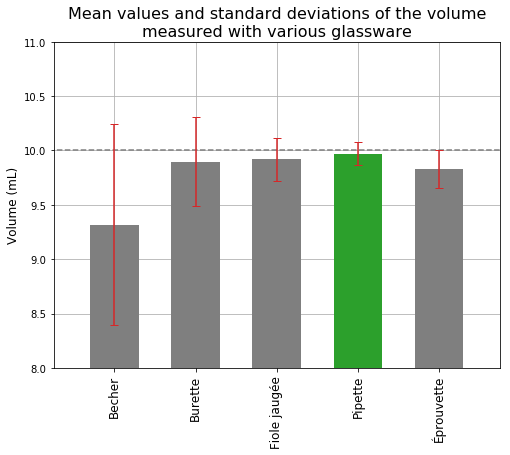

In [7]:
# set up the figure
plt.figure(figsize=(8, 6))
plt.title(
    "Mean values and standard deviations of the volume\nmeasured with various glassware", 
    fontsize=16)

# plot the bars
bars = plt.bar(
    left=range(len(means)), height=means, width=.6, color="C7",
    yerr=stds, capsize=4, ecolor="C3", error_kw=dict(zorder=3),
    zorder=2
)

# change the color of one bar
bars[3].set_facecolor("C2")

# plot an horizontal line at y = 10
plt.hlines(10, -1, 5, colors="C7", linestyles="dashed")

# labels and layout
plt.ylim((8, 11))
plt.xlim((-.75, 4.75))
plt.ylabel("Volume (mL)", fontsize=12)
plt.xticks(range(len(means)), means.index, rotation=90, fontsize=12)
plt.grid()

### Diagramme en barres horizontales

Voici une version avec des barres horizontales. Dans cette version, les axes x et y sont supprimés et les valeurs sont directement écrites sur le graphique.

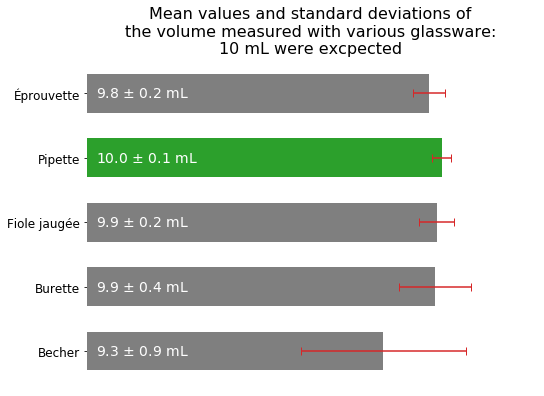

In [8]:
# set up the figure
plt.figure(figsize=(8, 6))
plt.title(
    "Mean values and standard deviations of\nthe volume measured with various glassware:\n10 mL were excpected", 
    fontsize=16)

# plot the bars horizontaly 
bars = plt.barh(
    bottom=range(len(means)), width=means, height=.6, color="C7",
    xerr=stds, capsize=4, ecolor="C3", error_kw=dict(zorder=3),
    zorder=2)

# change the color of one bar
bars[3].set_facecolor("C2")

# set up the limits, manage ticks and remove axis frame
xmin = 6
plt.xlim((xmin, 11))
plt.yticks(range(len(means)), means.index, fontsize=12)
plt.xticks([])
plt.gca().set_frame_on(False)

# add direct label on the bars
y = 0
for mean, std in zip(means, stds):
    plt.text(xmin + .1, y, "%.1f $\pm$ %.1f mL" % (mean, std), 
             fontsize=14, color="white", verticalalignment="center")
    y += 1

## 3. Densités de probabilités

Nous allons voir comment construire une densités de probabilités pour visualiser les données. Dans un premier temps nous construirons l'histogramme pour une série de mesures puis pour l'ensemble des mesures.

Pour constuire un histogramme sur un intervalle, celui-ci est divisé en un nombre donné de morceaux (les *bins*) et il s'agit ensuite de compter combien de mesures se trouvent dans chacun de ces morceaux.

### 3.1 Histogrammes

Tout d'abord, récupérons les volumes mesurés avec l'éprouvette.

In [9]:
volumes_burette = df["Burette"].values

Matplotlib se charge de calculer l'histogramme. Il suffit de lui donner la liste des valeurs. On peut lui donner le nombre de *bins* (ou de morceaux) que l'on veut sur l'intervalle, ou directement la liste des bornes inférieures des intervalles.

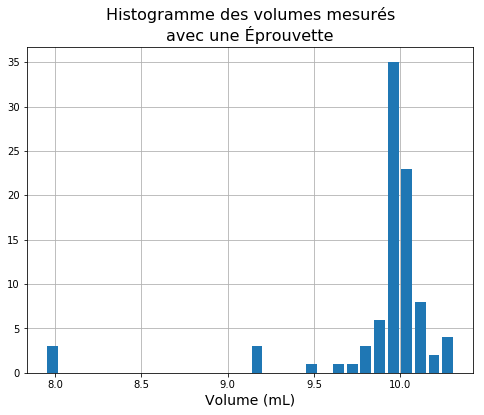

In [10]:
plt.figure(figsize=(8, 6))
hist, bins, patches = plt.hist(volumes_burette, bins=30, rwidth=.8, zorder=2)
plt.xlabel("Volume (mL)", fontsize=14)
plt.title("Histogramme des volumes mesurés\navec une Éprouvette", fontsize=16)
plt.grid()

On peut tracer les histogrammes pour chaque colonne du tableau. Il faut cependant penser à plusieurs choses :

* Utiliser tout le temps le même nombre de bins
* changer la valeur de histtype pour essayer d'avoir une superposition lisible.
* supprimer les valeurs manquante éventuelles (valeurs `NaN` à la fin du tableau).

Malgré ces précautions le graphique est peu lisible :

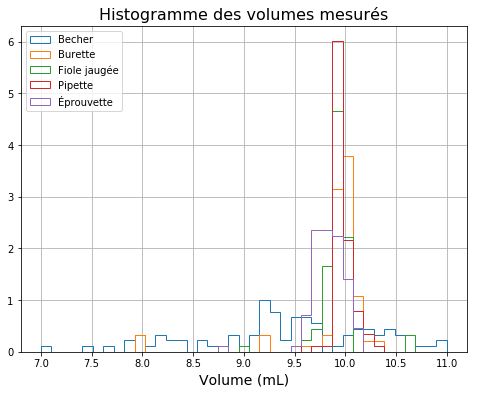

In [11]:
# set up a figure
plt.figure(figsize=(8, 6))

# list of data after removing NaN values with dropna()
data = [df[column].dropna().values for column in df]

# compute and plot the histograms
bins = np.linspace(7, 11, 40, endpoint=True)
for column in df:
    hist, bins, patches = plt.hist(df[column].dropna(), label=column,
                                   histtype="step", normed=True,
                                   bins=bins, rwidth=.8, zorder=2)

# layout
plt.xlabel("Volume (mL)", fontsize=14)
plt.title("Histogramme des volumes mesurés", fontsize=16)
plt.legend(loc="upper left")
plt.grid()

Pour illustrer l'efficacité de `pandas`, voici sur le même graphique les histogrammes sur chaque colonne. Pour être exact, il s'agit d'une estimation de la densité (kde pour kernel density approximation). Le graphique obtenu est plus lisible que la fonction en escalier ci-dessus.

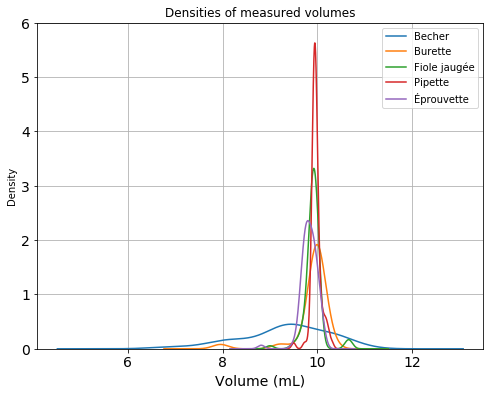

In [12]:
df.plot.kde(figsize=(8, 6), 
            title="Densities of measured volumes", 
            ylim=(0, 6), fontsize=14, grid=True)
plt.xlabel("Volume (mL)", fontsize=14)

### 3.2 *Box plots* ou boîtes à moustaches

Les *box plots* sont une façon efficace de représenter simultanément plusieurs densités de probabilité. Au lieu de dessiner la densité, un *box plot* utilise plusieurs descripteurs statistiques qui permettent de s'en faire une représentation. Un *box plot* fait apparaitre :

* La médiane, qui sépare les données en deux parties égales.
* Le premier quartile en dessous duquel se trouve 25 % des données.
* Le troisième quartile en dessous duquel se trouve 75 % des données.
* La moyenne peut également être représentées.

Pour chaque série de données, un rectangle s'étend du premier au troisème quartile et est coupé par la médiane (la bôites). Le domaine indiqué par les barres d'erreurs (les moustaches) indique soit l'intervalle entre la valeur minimale et la valeur maximale soit, comme dans matplotlib, un intervalle proportionnel à la différence entre le premier et troisième quartile.

Sur le graphique ci-dessous, la médiane est tracée en orange et la moyenne est indiquée par un triangle vert. Enfin, les points en dehors des barres d'erreurs représentent les mesures qui ne sont pas contenues dans l'intervalle.

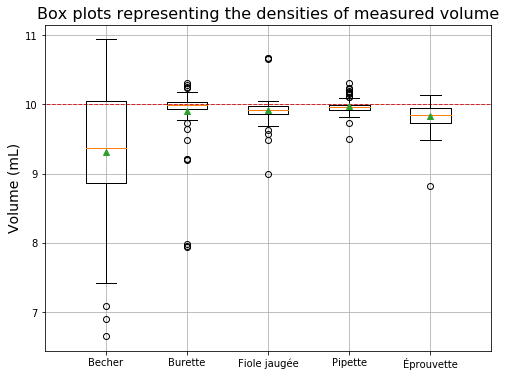

In [13]:
# set up data: build a list for each column
data = [df[column].dropna().values for column in df]

# set up a figure
fig = plt.figure(figsize=(8, 6))
plt.title("Box plots representing the densities of measured volume", fontsize=16)

# the violin plot
violin = plt.boxplot(data, labels=df.columns, showmeans=True)

# add an horizontal line
plt.hlines(10, 0, 6, linestyles="dashed", color="C3", linewidth=1)

# axes and layout
plt.ylabel("Volume (mL)", fontsize=14)
plt.xlim((.25, 5.75))
plt.grid()

On peut demander directement à Pandas de tracer ce graphique :

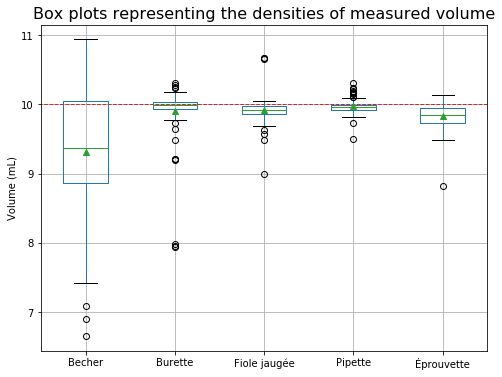

In [14]:
df.plot.box(figsize=(8, 6), grid=True, showmeans=True)
plt.title("Box plots representing the densities of measured volume", fontsize=16)
plt.hlines(10, 0, 6, linestyles="dashed", color="C3", linewidth=1)
plt.ylabel("Volume (mL)")

### 3.2 Violin plots

Une autre manière de représenter les densités pour chaque colonne du tableau est l'utilisation de *violin plots*. Dans ce cas, pour chaque colonne, une approximation de la densité est tracée horizontalement. Les valeurs extrèmes ainsi que la médianne sont également représentés par défaut dans matplotlib.

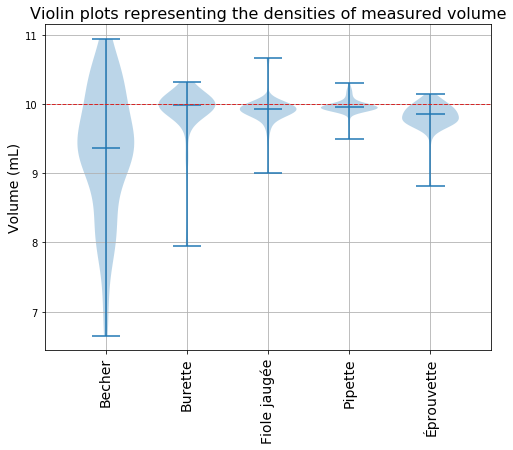

In [15]:
# set up data: build a list for each column
data = [df[column].dropna().values for column in df]

# set up a figure
fig = plt.figure(figsize=(8, 6))
plt.title("Violin plots representing the densities of measured volume", fontsize=16)

# the violin plot
violin = plt.violinplot(data, showmedians=True, widths=.7)

# add an horizontal line
plt.hlines(10, 0, 6, linestyles="dashed", color="C3", linewidth=1)

# axes and layout
plt.ylabel("Volume (mL)", fontsize=14)
plt.xlim((.25, 5.75))
xticks, labels = plt.xticks(range(1, 6), df.columns, rotation=90, fontsize=14)
plt.grid()

Pour ces graphiques en lien avec les statistiques, le module [`seaborn`](http://seaborn.pydata.org/) met à disposition une interface très efficace entre les tableaux pandas et matplotlib. De plus, par défaut, les graphiques produits par seaborn sont esthétiquement plus aboutis que ceux de matplotlib.

Néanmoins, seaborn utilise en interne la librairie matplotlib pour tracer les graphiques. Pour utiliser pleinement seaborn il est donc préférable de savoir se servir de matplotlib.

Voici comment importer le module en choisissant un style et une taille de police :

In [16]:
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.5)

Voyons un example pour les *violin plots*. Dans cet exemple, un *box plot* est représenté à l'intérieur du *violin plot* :

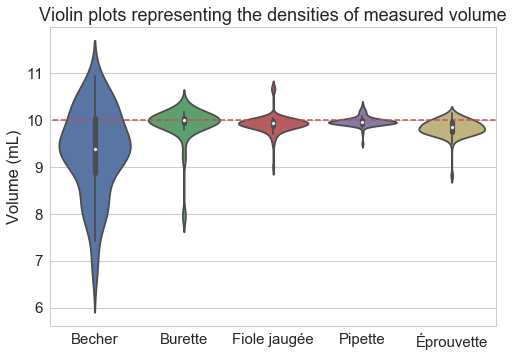

In [17]:
ax = sns.violinplot(data=df, scale="count", inner="box", figize=(8, 6))
ax.set_title("Violin plots representing the densities of measured volume")
ax.set_ylabel("Volume (mL)")
ax.hlines(10, -1, 6, linestyles="dashed", color="C2", linewidth=1.5)

## 4. Exemples avec un autre jeu de données

Pour illustrer la complémentarité entre seaborn et pandas, voici un exemple sur un autre jeu de données. Dans cet exemple on va utiliser les résultats d'une enquête du CHU d'Angers sur le ronflement. Un échantillon de 100 personnes a été interrogé et pour chaque personne on dispose de variables quantitatives : 

* poids, 
* âge, 
* taille, 
* nombre de verres d'alcool consommés par jour

et de variables qualitatives : 
* sexe, 
* consommation du tabac, 
* ronflement.

Nous allons importer ces données et faire quelques traitements :

In [18]:
# importation avec pandas
df_ronfle = pd.read_csv("ronfle.csv", skiprows=7, sep=";", usecols=range(7))

# on remplace 0 = homme et 1 = femme
df_ronfle["SEXE"] = ["homme" if s == 0 else "femme" for s in df_ronfle["SEXE"]]
# on remplace 0 = non-fumeur et 1 = fumeur
df_ronfle["TABAC"] = ["non-fumeur" if s == 0 else "fumeur" for s in df_ronfle["TABAC"]]
# ronflement : oui = 0 et non = 1
df_ronfle["RONFLE"] = ["non" if s == 0 else "oui" for s in df_ronfle["RONFLE"]]

# calcul de l'IMC :
df_ronfle["IMC"] = df_ronfle.POIDS / (df_ronfle.TAILLE / 100)**2

df_ronfle.head()

AGE  POIDS  TAILLE  ALCOOL   SEXE       TABAC RONFLE        IMC
0   47     71     158       0  homme      fumeur    non  28.440955
1   56     58     164       7  homme  non-fumeur    oui  21.564545
2   46    116     208       3  homme      fumeur    non  26.812130
3   70     96     186       3  homme      fumeur    non  27.748873
4   51     91     195       2  homme      fumeur    oui  23.931624

In [27]:
df_ronfle

AGE  POIDS  TAILLE  ALCOOL   SEXE       TABAC RONFLE        IMC  \
0    47     71     158       0  homme      fumeur    non  28.440955   
1    56     58     164       7  homme  non-fumeur    oui  21.564545   
2    46    116     208       3  homme      fumeur    non  26.812130   
3    70     96     186       3  homme      fumeur    non  27.748873   
4    51     91     195       2  homme      fumeur    oui  23.931624   
5    46     98     188       0  femme  non-fumeur    non  27.727478   
6    40    112     193       5  homme      fumeur    non  30.067921   
7    46     77     165       0  femme  non-fumeur    non  28.282828   
8    49     76     164       0  homme  non-fumeur    non  28.256990   
9    39    119     196       3  homme  non-fumeur    non  30.976676   
10   37     99     189       4  homme      fumeur    non  27.714790   
11   41    117     194       8  homme      fumeur    non  31.087257   
12   56     83     171       2  homme      fumeur    non  28.384802   
13   62     68     165       4  homme      fumeur    non  24.977043   
14   50    108     194      10  homme      fumeur    non  28.695929   
15   33     98     188       0  femme      fumeur    non  27.727478   
16   61     85     174       1  homme  non-fumeur    non  28.075043   
17   55     83     171      10  homme      fumeur    non  28.384802   
18   34     92     181       0  femme      fumeur    non  28.082171   
19   59     97     187       0  femme  non-fumeur    non  27.738854   
20   37    102     192       8  homme      fumeur    non  27.669271   
21   49    107     198       8  homme      fumeur    non  27.293133   
22   38     69     166       0  femme  non-fumeur    non  25.039919   
23   63    112     193       0  femme      fumeur    non  30.067921   
24   35    108     194       0  homme      fumeur    non  28.695929   
25   55     85     174       0  homme      fumeur    non  28.075043   
26   57     60     166       4  femme      fumeur    non  21.773842   
27   61     98     188       0  homme  non-fumeur    oui  27.727478   
28   43     62     158       3  homme      fumeur    non  24.835763   
29   43    108     194       3  homme      fumeur    non  28.695929   
..  ...    ...     ...     ...    ...         ...    ...        ...   
70   42     76     164       3  homme      fumeur    oui  28.256990   
71   65    105     196       8  homme      fumeur    oui  27.332362   
72   57     97     187       2  homme  non-fumeur    oui  27.738854   
73   64     87     176       4  homme      fumeur    oui  28.086260   
74   48     91     180       0  femme      fumeur    oui  28.086420   
75   50     78     166       3  homme      fumeur    oui  28.305995   
76   72    117     194       0  homme  non-fumeur    oui  31.087257   
77   69    107     198       2  homme      fumeur    oui  27.293133   
78   67     96     186       0  homme  non-fumeur    oui  27.748873   
79   32    110     196      15  homme      fumeur    oui  28.633903   
80   64     49     164       4  homme      fumeur    oui  18.218322   
81   71     76     164       4  homme  non-fumeur    oui  28.256990   
82   65    112     193       0  femme  non-fumeur    oui  30.067921   
83   46    113     194       8  homme  non-fumeur    oui  30.024445   
84   64     54     159       4  homme      fumeur    oui  21.359915   
85   66     93     182       5  homme      fumeur    oui  28.076319   
86   51    100     190       3  homme  non-fumeur    oui  27.700831   
87   62     68     165       0  homme      fumeur    non  24.977043   
88   47     77     165       0  femme  non-fumeur    oui  28.282828   
89   38     78     166       0  homme      fumeur    non  28.305995   
90   40     81     169       7  homme      fumeur    oui  28.360352   
91   58     85     174      10  homme      fumeur    non  28.075043   
92   49     90     179       0  femme  non-fumeur    non  28.089011   
93   57     91     180       5  homme      fumeur    non  28.086420   
94   68     98     188      

In [19]:
df_ronfle.describe()

AGE       POIDS      TAILLE      ALCOOL         IMC
count  100.000000  100.000000  100.000000  100.000000  100.000000
mean    52.270000   90.410000  181.100000    2.950000   27.216379
std     11.397195   18.735854   13.366247    3.364626    2.802820
min     23.000000   42.000000  158.000000    0.000000   16.203079
25%     43.000000   77.000000  166.000000    0.000000   27.557928
50%     52.000000   95.000000  186.000000    2.000000   28.071981
75%     62.250000  107.000000  194.000000    4.250000   28.384802
max     74.000000  120.000000  208.000000   15.000000   32.552083

On va maintenant construire un *violin plot* en distinguant plusieurs variables qualitatives.

On sépare:

* les fumeurs des non-fumeurs
* les personnes qui ronflent ou non

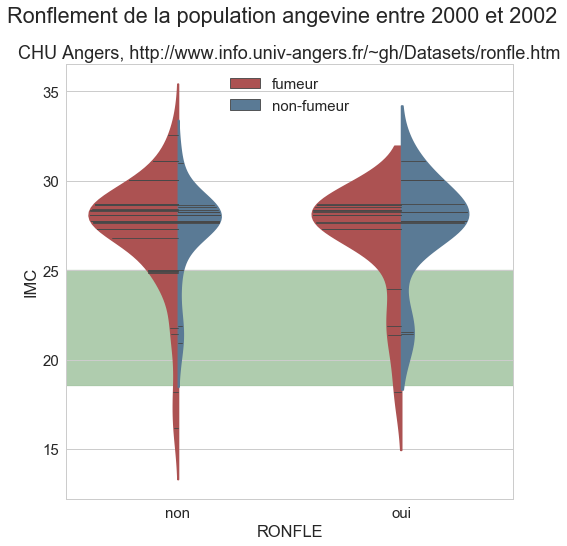

In [20]:
# figure and titles
plt.figure(figsize=(8, 8))
plt.suptitle("Ronflement de la population angevine entre 2000 et 2002")
plt.title("CHU Angers, http://www.info.univ-angers.fr/~gh/Datasets/ronfle.htm")

# violin plots
palette = sns.color_palette("Set1", desat=.6)
sns.violinplot(
    # les données
    data=df_ronfle, 
    # les variables à considérer
    x="RONFLE", y="IMC", hue="TABAC", 
    # 
    split=True, scale="count",
    # on affiche les données à l'intérieur comme des batons
    inner="stick", 
    # couleurs
    palette=palette,
    # positions = premier plan
    zorder=2
)
plt.legend(loc="upper center")
plt.fill_between(x=[-1, 2], y1=[18.5, 18.5], y2=[25, 25], zorder=0, alpha=.5, color=palette[2])

Voici deux exemples de graphiques qui utilisent les mêmes données :

Ci-dessous, un exemple de *scatter plot* où la couleur du point est liée au nombre de verres consommés par jour.

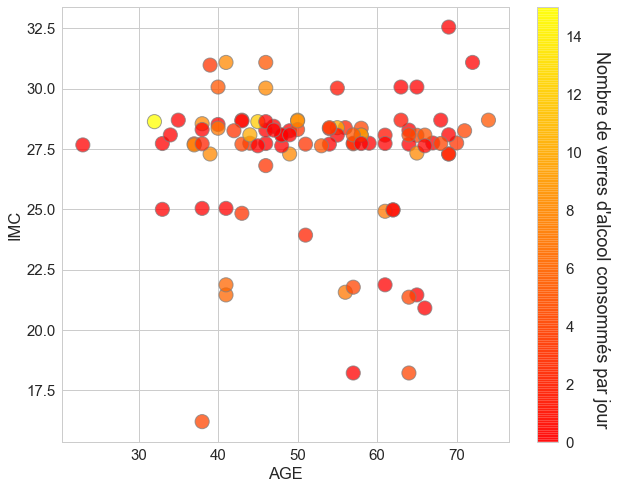

In [21]:
axes = df_ronfle.plot.scatter(
    x="AGE", y="IMC", s=200, figsize=(10, 8), 
    c=df_ronfle.ALCOOL, cmap="autumn", sharex=False, linewidth=1, 
    edgecolor="gray", alpha=.75,
)
axes.text(x=87, y=31, s="Nombre de verres d'alcool consommés par jour", rotation=270)

Dans ce dernier exemple l'IMC est représenté en fonction de l'âge. Pour chaque point, la couleur indique si la personne ronfle ou ne ronfle pas tandis que la taille du point indique la consommation d'alcool par jour.

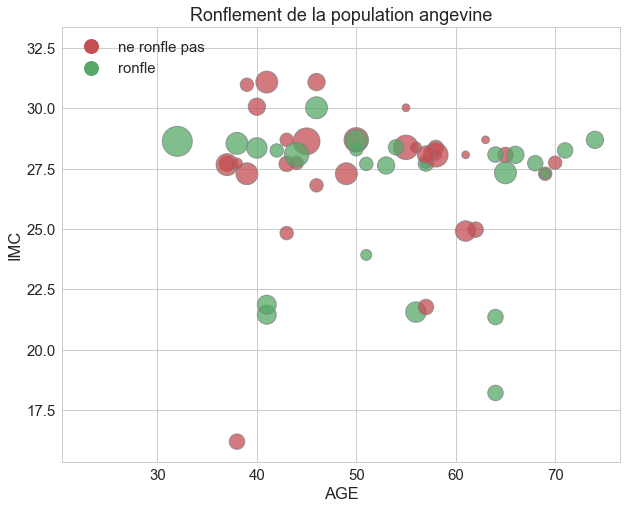

In [22]:
axes = df_ronfle.plot.scatter(
    x="AGE", y="IMC", s=60 * df_ronfle.ALCOOL, figsize=(10, 8), 
    c=["C2" if "non" in val else "C1" for val in df_ronfle.RONFLE], linewidth=1, 
    edgecolor="gray", alpha=.75,
)
red = mpl.lines.Line2D([], [], color="C2", label="ne ronfle pas", marker="o", markersize=15, linestyle="")
green = mpl.lines.Line2D([], [], color="C1", label="ronfle", marker="o", markersize=15, linestyle="")
plt.legend(handles=[red, green])
plt.title("Ronflement de la population angevine")

#### Multi violin plots

In [23]:
df_ronfle["SEXE_RONFLE"] = df_ronfle[["SEXE", "RONFLE"]].apply(lambda x: " ".join(x), axis=1)
df_ronfle.head()

AGE  POIDS  TAILLE  ALCOOL   SEXE       TABAC RONFLE        IMC SEXE_RONFLE
0   47     71     158       0  homme      fumeur    non  28.440955   homme non
1   56     58     164       7  homme  non-fumeur    oui  21.564545   homme oui
2   46    116     208       3  homme      fumeur    non  26.812130   homme non
3   70     96     186       3  homme      fumeur    non  27.748873   homme non
4   51     91     195       2  homme      fumeur    oui  23.931624   homme oui

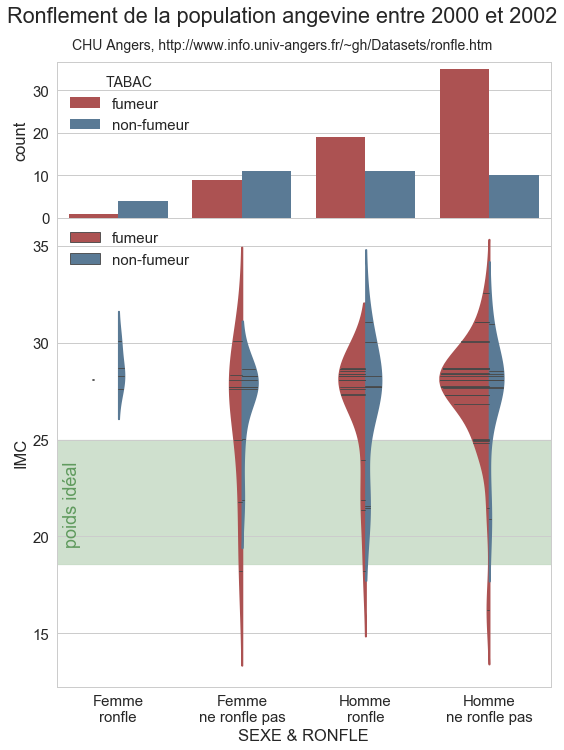

In [26]:
# figure and titles
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10), 
                         sharex=True, gridspec_kw=dict(height_ratios=(1, 3), hspace=0))
fig.suptitle("Ronflement de la population angevine entre 2000 et 2002", y=1.05)
fig.text(.5, .99, "CHU Angers, http://www.info.univ-angers.fr/~gh/Datasets/ronfle.htm", 
         fontsize=14, ha="center")

# ordre sur l'axe des abscisses
ordre = ["femme oui", "femme non", "homme oui", "homme non"]

# diagramme e, barre
sns.countplot(
    # les données
    data=df_ronfle, 
    # les variables à considérer
    x="SEXE_RONFLE", hue="TABAC", 
    # ordre
    order=ordre,
    # layout
    ax=axes[0], palette=palette,
)

# violin plots
palette = sns.color_palette("Set1", desat=.6)
sns.violinplot(
    # les données
    data=df_ronfle, 
    # les variables à considérer et l'ordre
    x="SEXE_RONFLE", y="IMC", hue="TABAC", 
    order=ordre,
    # split according to TABAC
    split=True, 
    # la larguer des violins est cohérente sur l'ensemble
    scale="count", scale_hue=False,
    # on affiche les données à l'intérieur comme des batons
    inner="stick", 
    # couleurs
    palette=palette,
    # positions = premier plan
    zorder=2,
    ax=axes[1]
)
# add a green background for "normal" IMC
axes[1].fill_between(x=[-1, 4], y1=[18.5, 18.5], y2=[25, 25], zorder=0, alpha=.3, color=palette[2])
fig.text(0.12, .4, "poids idéal", rotation=90, color=palette[2])

# nom des axes et légende
axes[1].set_xlabel("SEXE & RONFLE")
axes[1].legend(loc="upper left")
axes[1].set_xticklabels(["Femme\nronfle", "Femme\nne ronfle pas", "Homme\nronfle", "Homme\nne ronfle pas"])

fig.tight_layout()
fig.savefig("ronflement.png", dpi=300, bbox_inches="tight")